In [3]:
import os
import sys

cwd = os.getcwd()
if cwd not in sys.path:
    sys.path.append(cwd)

from pset3_make_sim import make_sim
from Constants import Units

prob1
1. This is a time-invariant action, so is necessarily a conserved quanity under the euler-lagrange equations of motion
2. In units of epsilon=1, m=1, the temp is just $\sum v^2$
3. $r(t_1) = r(t_0) + v(t_0) \cdot dt + \frac{1}{2}a(t_0)\cdot dt^2$

   $v(t_1) = v(t_0) + \frac{1}{2}(a(r_1) + a(r_0))\cdot dt$
   
   Then, if we plug the reversed version with $t_0$ -> $t_1$ and $dt$ -> $-dt$, we get:
   
   $r(t_0) = r(t_1) - v(t_1)\cdot dt + \frac{1}{2}a(t_1)\cdot dt^2$
   
   or:
   
   $r(t_0) = r(t_0) + v(t_0)\cdot dt \frac{1}{2}(t_0 + t_1)dt^2 - v(t_0)\cdot dt - \frac{1}{2}(t_0 + t_1)dt^2$
   
   and
   
   $r(t_0) = r(t_0)$
   
   as desired.
4. If we make the same transforms to the euler formula:

   $r(t_1) = r(t_0) + v(t_0) \cdot dt + \frac{1}{2}a(t_0)\cdot dt^2$
   
   This is just not time-reversible

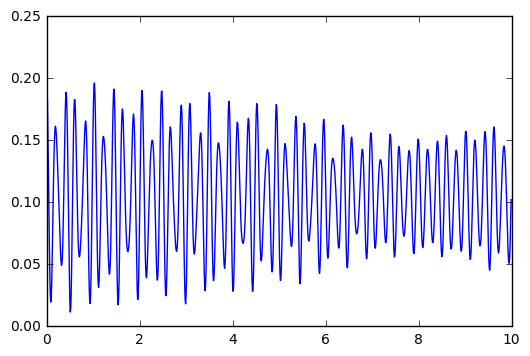

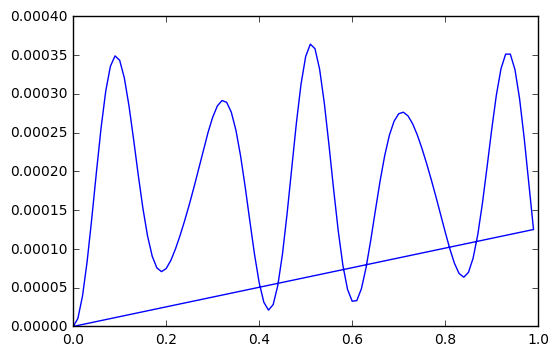

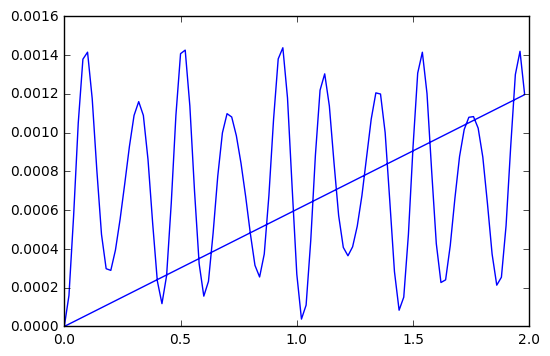

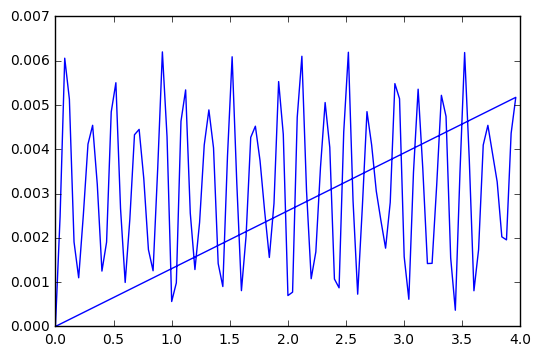

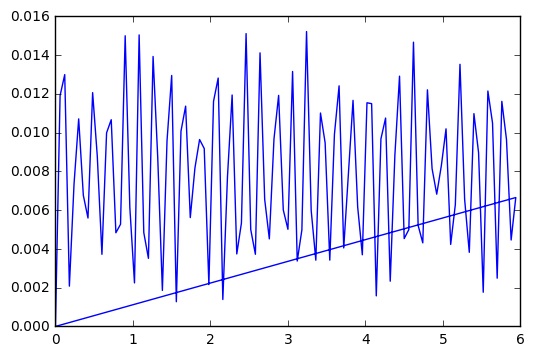

In [4]:
def prob2():
    print("Temperature")
    sim = make_sim(num_basic_copies=1) # This should be num_basic_copies = 2, but it takes too long
    sim.num_steps = 1000
    sim.deltat = 0.01
    sim.track_quantity(sim.computation.temperature)
    sim.run()
    
    print("Now adjusting stepsizes and computing total_energy_deviation")
    stepsizes = [0.01, 0.02, 0.04, 0.06]
    for stepsize in stepsizes:
        sim = make_sim(num_basic_copies=1) # This should be num_basic_copies = 2, but it takes too long
        sim.track_quantity(sim.computation.total_energy_deviation)
        sim.num_steps = 100
        sim.deltat = stepsize
        sim.run()
prob2()

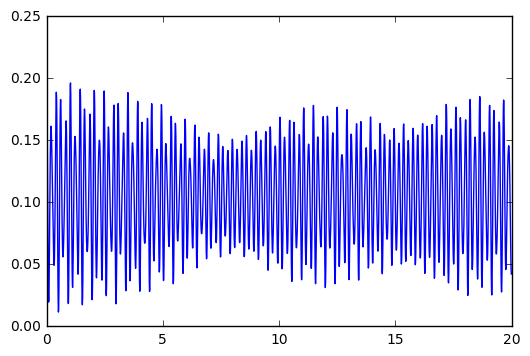

In [12]:
def prob3():
    def iteration(num_basic_copies):
        sim = make_sim(num_basic_copies=num_basic_copies)
        sim.num_steps = 2000
        sim.deltat = 0.01
        sim.track_quantity(sim.computation.temperature)
        sim.run()

    # numcopies = [1,2,3] # This is what I should do, but it takes too long
    numcopies = [1]
    for num_basic_copies in numcopies:
        iteration(num_basic_copies)
    
#     The simulation converges to kbT = 0.1, which is half of its initial value (re virial thm as discussed in class)
#     As the size of the computational cell ins increased, this converges faster because we're better reflecting the
#     actual bulk properties of the material

prob3()

prob4 - didn't get to this one

In [24]:
def prob5():
    # Based on previous simulations, the approximate period of one atomic oscillation is:
    period = 0.1 # in units of 'time step', which is m**(1/2) * sigma / epsilon**(1/2)
    units = Units()
    units.epsilon = 1 # epsilon should be set to 1 so we can compare to kbT = 0.2 (which implicitly had epsilon = 1)
    # units.mass = 1
    true_time = units.time_true_units(period)
    print("true_time: ", true_time)
    true_freq = 1/true_time
    energy = true_freq * units.hbar

    print("energy: ", energy) # In units of epsilon = 1
    # Compare to kbT = 0.2
prob5()

# This gave 1e-11, which really doesn't seem right because it's so much smaller than 1e-11. 
# So maybe i did something weird here, although I went through it several times and it should be okay.

true_time:  8.761187134173086e-24
energy:  1.1413978319210774e-11


In [ ]:
def prob6():
    def mean_sq_disp(temp=None):
        sim = make_sim(temp=temp, num_basic_copies=1)
        sim.deltat = 0.01
        sim.num_steps = 2000
        sim.computation.store_initial_positions()
        sim.track_quantity(sim.computation.mean_squared_displacement)
        sim.track_quantity(sim.computation.temperature)
        sim.run()

    temps = [0.2, 4]
    for temp in temps:
        mean_sq_disp(temp=temp)

prob6()
# When the temperature is small, the mean displacement should be bounded. When the temperature is large, the molecules will escape
# and will probably 'break up' the crystal.
# I think the issue here is that I couldn't make the computataional cell large enough (it takes so long to run)
# If I could actually see the bulk behavior, it should behave as expected.
# (See below)

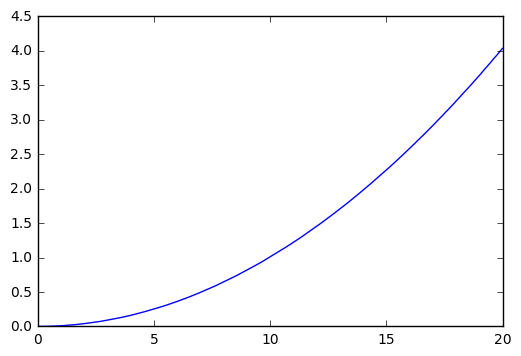

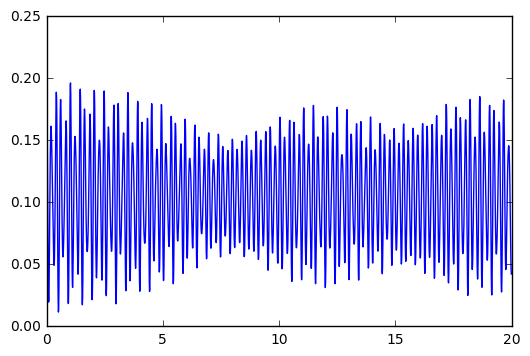

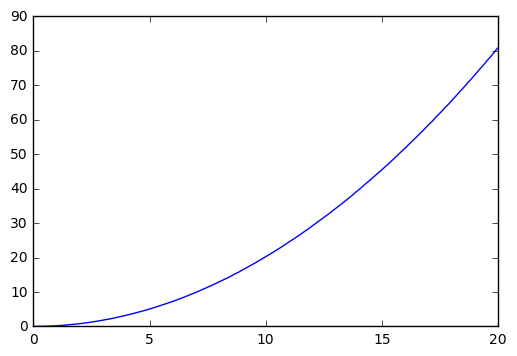

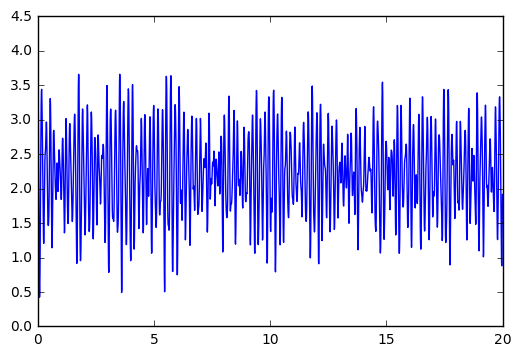

6.779610149002307e-16


In [5]:

diffusion_time = 1.0
units = Units()
true_time = units.time_true_units(diffusion_time)
print(true_time)
# the distance scale here is approximately 1nm
true_time *= 1e9
print(true_time)
# Which is in m^2/s, so this is roughly comparable) (roughly)

2.1439009718840813e-12
0.0021439009718840813
